c:\Users\PC\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Raster CRS: EPSG:4326
Raster Bounds: BoundingBox(left=0.0, bottom=11811.0, right=11811.0, top=0.0)
Raster Shape: (11811, 11811)


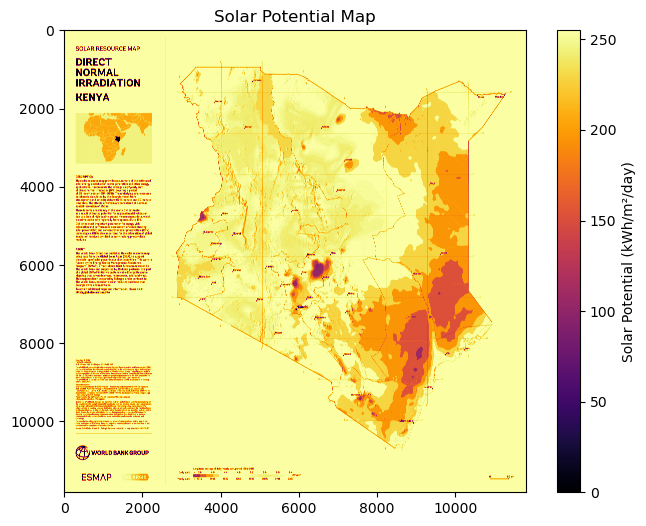

In [1]:
import rasterio
import matplotlib.pyplot as plt

# Path to your GeoTIFF file
tif_path = "kenya_dni_solar.tif"  # update with your actual file path

# Open the raster
with rasterio.open(tif_path) as src:
    # Read the first band
    data = src.read(1)
    
    # Get metadata (helpful later for clipping)
    profile = src.profile
    bounds = src.bounds
    crs = src.crs
    
    print("Raster CRS:", crs)
    print("Raster Bounds:", bounds)
    print("Raster Shape:", data.shape)

# Plot the raster
plt.figure(figsize=(8,6))
plt.imshow(data, cmap="inferno")
plt.colorbar(label="Solar Potential (kWh/m²/day)")
plt.title("Solar Potential Map")
plt.show()


c:\Users\PC\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


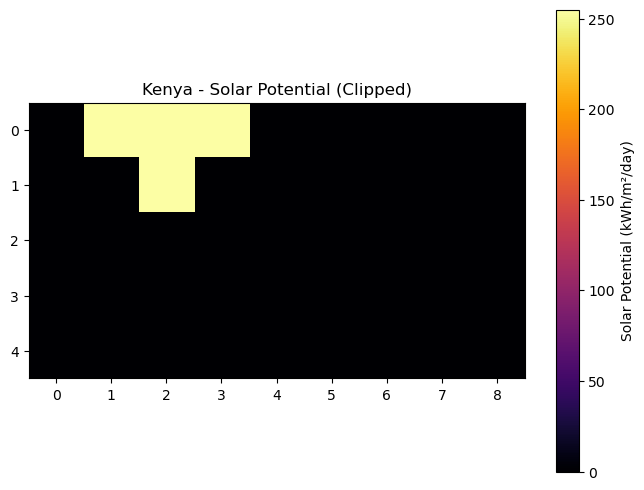

In [2]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

# Paths (update these)
tif_path = "kenya_dni_solar.tif"
shapefile_path = "ke_agriculture.shp"  # Kenya boundary shapefile

# Load shapefile
kenya = gpd.read_file(shapefile_path)
kenya = kenya.to_crs("EPSG:4326")  # match CRS to raster (WGS84)

# Open raster and clip
with rasterio.open(tif_path) as src:
    out_image, out_transform = mask(src, kenya.geometry, crop=True)
    out_meta = src.meta

# Plot clipped raster
plt.figure(figsize=(8,6))
plt.imshow(out_image[0], cmap="inferno")
plt.colorbar(label="Solar Potential (kWh/m²/day)")
plt.title("Kenya - Solar Potential (Clipped)")
plt.show()


In [3]:
import rasterio
import geopandas as gpd

tif_path = "kenya_dni_solar.tif"
shp_path = "ke_agriculture.shp"

# Check raster CRS
with rasterio.open(tif_path) as src:
    print("Raster CRS:", src.crs)

# Check shapefile CRS
kenya = gpd.read_file(shp_path)
print("Shapefile CRS:", kenya.crs)


Raster CRS: EPSG:4326
Shapefile CRS: EPSG:4326


c:\Users\PC\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [4]:
from rasterio.crs import CRS

# Assign CRS if missing
with rasterio.open(tif_path, 'r+') as src:
    if src.crs is None:
        src.crs = CRS.from_epsg(4326)  # WGS84
        print("CRS assigned: EPSG:4326")


c:\Users\PC\anaconda3\Lib\site-packages\rasterio\__init__.py:370: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = get_writer_for_path(path, driver=driver)(


c:\Users\PC\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


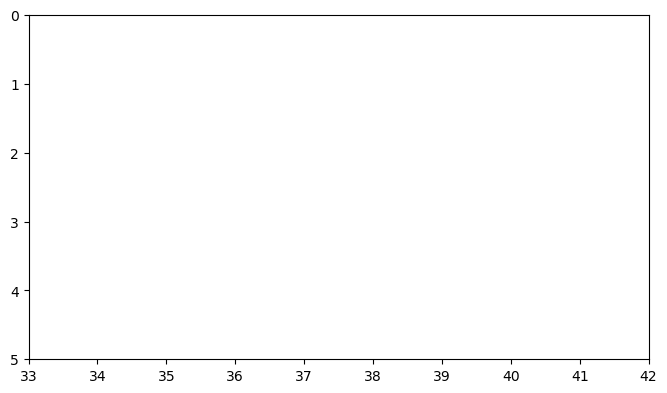

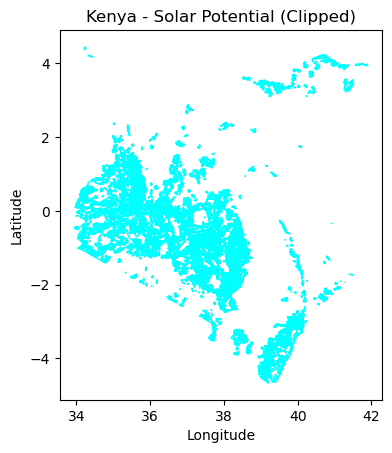

In [5]:
from rasterio.mask import mask
from rasterio.plot import show
import matplotlib.pyplot as plt

# Re-open raster after CRS fix
with rasterio.open(tif_path) as src:
    kenya = kenya.to_crs(src.crs)  # now it should work
    out_image, out_transform = mask(src, kenya.geometry, crop=True)
    out_meta = src.meta

plt.figure(figsize=(8, 8))
show(out_image, transform=out_transform, cmap="inferno")
kenya.boundary.plot(ax=plt.gca(), color="cyan", linewidth=1.0)
plt.title("Kenya - Solar Potential (Clipped)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


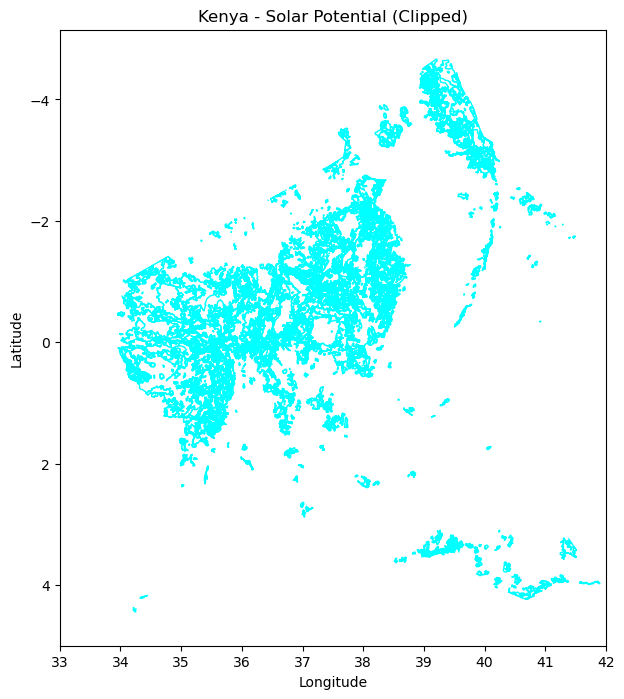

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot raster (clipped solar potential)
show(out_image, transform=out_transform, cmap="inferno", ax=ax)

# Overlay shapefile boundary (outline only)
kenya.boundary.plot(ax=ax, color="cyan", linewidth=1.0)

ax.set_title("Kenya - Solar Potential (Clipped)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


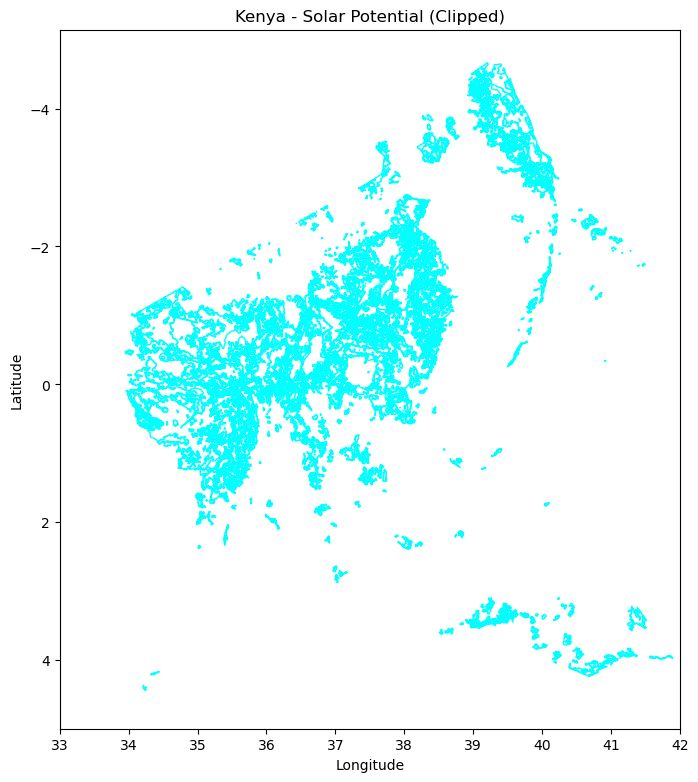

In [7]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(8, 10))

# Plot the raster (clipped solar potential)
show(out_image, transform=out_transform, cmap="inferno", ax=ax)

# Plot Kenya outline on top
kenya.boundary.plot(ax=ax, color="cyan", linewidth=1.0)

ax.set_title("Kenya - Solar Potential (Clipped)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [8]:
import numpy as np
print("Unique raster values:", np.unique(out_image))


Unique raster values: [  0 255]


In [9]:
import rasterio

tif_path = "DNI.tif"

with rasterio.open(tif_path) as src:
    arr = src.read(1)
    print("Raster dtype:", src.dtypes[0])
    print("Min:", arr.min())
    print("Max:", arr.max())


Raster dtype: float32
Min: nan
Max: nan


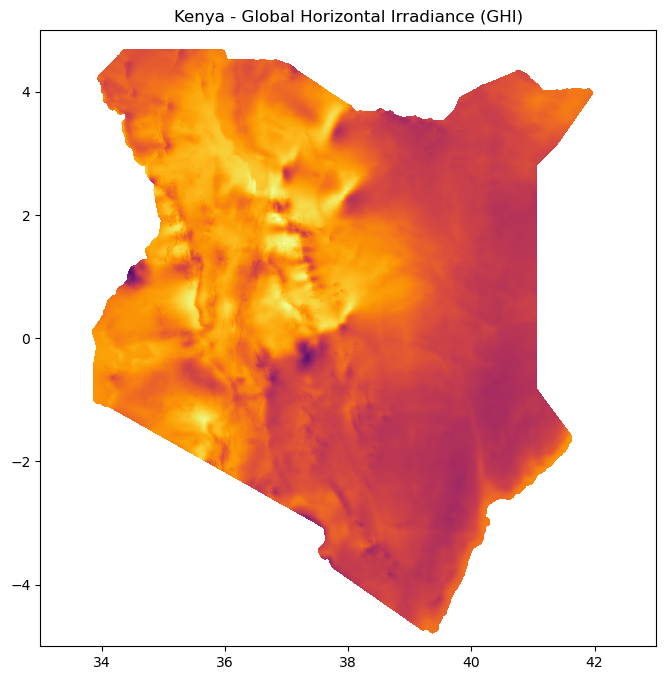

In [10]:
import matplotlib.pyplot as plt
from rasterio.plot import show

with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(8, 8))
    show(src, cmap="inferno", ax=ax)
    ax.set_title("Kenya - Global Horizontal Irradiance (GHI)")
    plt.show()


In [11]:
import rasterio

tif_path = "GHI.tif"

with rasterio.open(tif_path) as src:
    arr = src.read(1)
    print("Raster dtype:", src.dtypes[0])
    print("Min:", arr.min())
    print("Max:", arr.max())


Raster dtype: float32
Min: nan
Max: nan


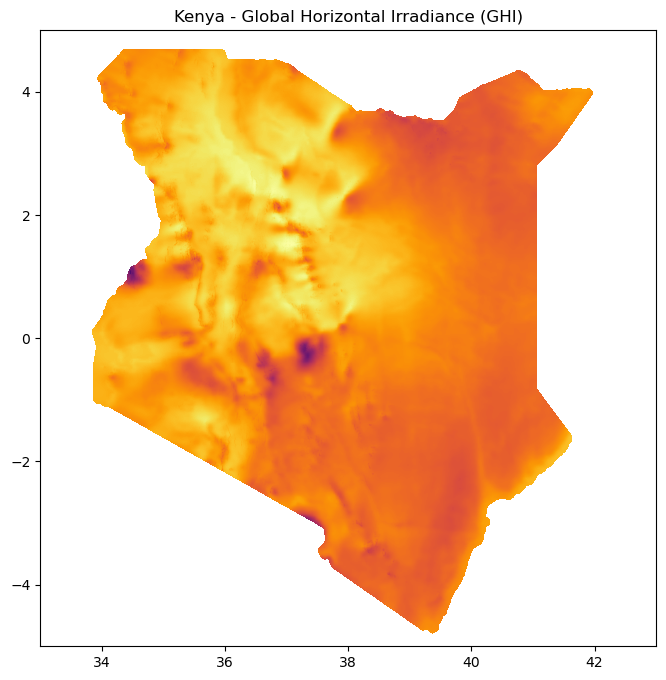

In [12]:
import matplotlib.pyplot as plt
from rasterio.plot import show

with rasterio.open(tif_path) as src:
    fig, ax = plt.subplots(figsize=(8, 8))
    show(src, cmap="inferno", ax=ax)
    ax.set_title("Kenya - Global Horizontal Irradiance (GHI)")
    plt.show()


In [15]:
import rasterio
import numpy as np

# Open your GHI raster file
with rasterio.open("GHI.tif") as src:
    ghi_data = src.read(1)  # Read the first band
    
    # Mask out NoData values (NaNs or negatives if present)
    ghi_data = np.where(np.isnan(ghi_data), np.nan, ghi_data)
    
    # Compute statistics
    min_val = np.nanmin(ghi_data)
    max_val = np.nanmax(ghi_data)
    mean_val = np.nanmean(ghi_data)
    std_val = np.nanstd(ghi_data)

print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Mean: {mean_val}")
print(f"Std Dev: {std_val}")


Min: 1053.7459716796875
Max: 2463.24609375
Mean: 2109.251708984375
Std Dev: 137.6468048095703


In [14]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_bounds
import matplotlib.pyplot as plt
import numpy as np

# --- Load shapefile ---
shapefile_path = "ke_waterbodies.shp"   # change to your path
gdf = gpd.read_file(shapefile_path)

print(gdf.head())
print("CRS:", gdf.crs)

# --- Define raster parameters ---
# Use the extent of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds  

# Resolution in degrees (e.g., ~0.01° ~ 1km at equator, adjust as needed)
resolution = 0.01  

width = int((maxx - minx) / resolution)
height = int((maxy - miny) / resolution)

transform = from_bounds(minx, miny, maxx, maxy, width, height)

# --- Rasterize ---
raster = rasterize(
    [(geom, 1) for geom in gdf.geometry],   # burn value 1 inside polygons
    out_shape=(height, width),
    transform=transform,
    fill=0,   # background value
    dtype="uint8"
)

# --- Save rasterized output ---
out_tif = "water_bodies_raster.tif"
with rasterio.open(
    out_tif,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype="uint8",
    crs=gdf.crs,
    transform=transform,
) as dst:
    dst.write(raster, 1)

print("Rasterized saved as:", out_tif)

# --- Plot result ---
plt.imshow(raster, cmap="Blues")
plt.title("Rasterized Water Bodies")
plt.colorbar(label="1 = Water, 0 = No Water")
plt.show()


DataSourceError: ke_waterbodies.shp: No such file or directory